In [ ]:
!unzip '/content/drive/MyDrive/braintumor(image_dataset).zip'

unzip:  cannot find or open /content/drive/MyDrive/braintumor(image_dataset).zip, /content/drive/MyDrive/braintumor(image_dataset).zip.zip or /content/drive/MyDrive/braintumor(image_dataset).zip.ZIP.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
import os # Import the os module
import numpy as np #Import numpy
import cv2 #Import cv2

X_train = []
Y_train = []
image_size = 256
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 256, 256, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(256,256,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 252, 252, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 124, 124, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 122, 122, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 59, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 57, 57, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 55, 55, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 27, 27, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 27, 27, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 25, 25, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 23, 23, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │      15,860,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 17,029,956 (64.96 MB)

 Trainable params: 17,029,956 (64.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# ✅ Callbacks for better training
early_stopping = EarlyStopping(
    monitor="val_loss",    # Stop when validation loss stops improving
    patience=5,            # Wait for 5 epochs before stopping
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",    # Reduce LR when validation loss stops improving
    factor=0.5,            # Reduce by half
    patience=3,            # Wait for 3 epochs before reducing LR
    min_lr=1e-6            # Minimum learning rate
)

# ✅ Compile the model before training
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# ✅ Train Model with Callbacks
history = model.fit(
    X_train, y_train,
    epochs =50,
    validation_split=0.1,  # 10% of training data used for validation
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# ✅ Save the Model
model.save("model1.h5")

# ✅ Load the Model (if needed)
from tensorflow.keras.models import load_model
loaded_model = load_model("model.h5")

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 70s 529ms/step - accuracy: 0.3215 - loss: 8.0178 - val_accuracy: 0.4252 - val_loss: 1.2211 - learning_rate: 0.0010
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 17s 207ms/step - accuracy: 0.4810 - loss: 1.1703 - val_accuracy: 0.6088 - val_loss: 0.9241 - learning_rate: 0.0010
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 208ms/step - accuracy: 0.5856 - loss: 0.9511 - val_accuracy: 0.6463 - val_loss: 0.7922 - learning_rate: 0.0010
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - accuracy: 0.6798 - loss: 0.7830 - val_accuracy: 0.5782 - val_loss: 0.9363 - learning_rate: 0.0010
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 211ms/step - accuracy: 0.7277 - loss: 0.6815 - val_accuracy: 0.6122 - val_loss: 1.1437 - learning_rate: 0.0010
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 212ms/step - accuracy: 0.7780 - loss: 0.5711 - val_accuracy: 0.6701 - val_loss: 0.8313 - learning_rate: 0.0010
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 213ms/step - accuracy: 0.8322 - loss: 0.

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.2700
Test Accuracy: 0.8899


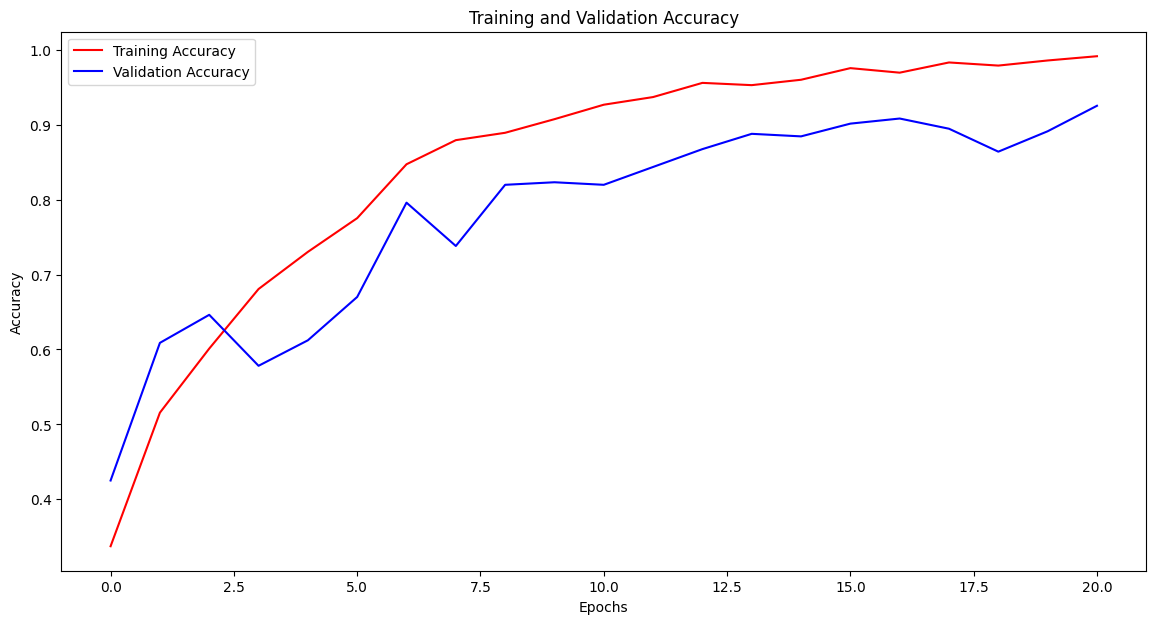

In [ ]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.xlabel("Epochs") # Add label for the x-axis
plt.ylabel("Accuracy") # Add label for the y-axis
plt.title("Training and Validation Accuracy") # Add title to the plot
plt.show()

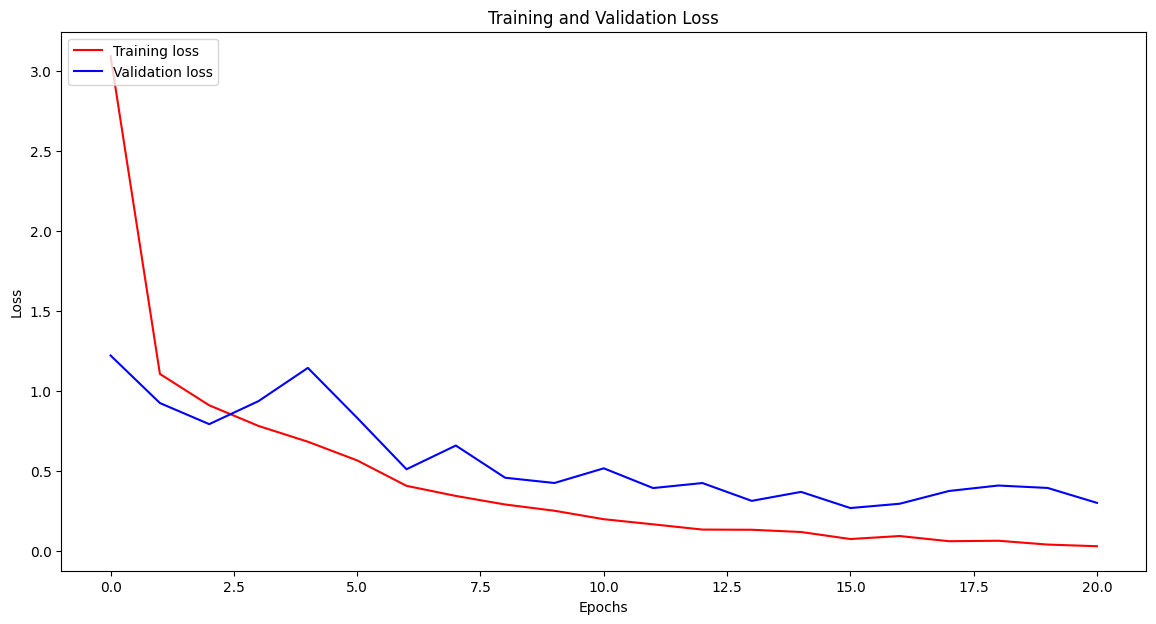

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.xlabel("Epochs") # Add label for the x-axis
plt.ylabel("Loss") # Add label for the y-axis
plt.title("Training and Validation Loss") # Add title to the plot
plt.show()

In [ ]:
# Example: Tuning learning rate and batch size
from tensorflow.keras.optimizers import Adam

# Try different learning rates
learning_rates = [1e-3, 1e-4, 1e-5]
batch_sizes = [32, 64, 128]

best_accuracy = 0.0

for lr in learning_rates:
    for bs in batch_sizes:
        # Create a new model or reset the weights of the existing model
        # ... (your model creation code) ...

        # Compile the model with the current hyperparameters
        model.compile(optimizer=Adam(learning_rate=lr),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        # Train the model
        history = model.fit(X_train, y_train, epochs=20,
                            batch_size=bs, validation_split=0.1)

        # Evaluate on the test set
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

        # Update best accuracy if current configuration is better
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_lr = lr
            best_bs = bs

print(f"Best Accuracy: {best_accuracy:.4f}")
print(f"Best Learning Rate: {best_lr}")
print(f"Best Batch Size: {best_bs}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 186ms/step


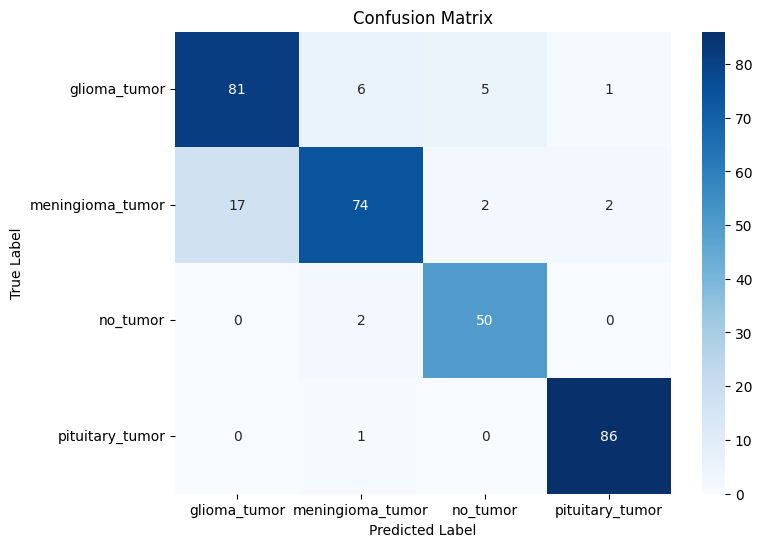

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns  # For better visualization

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true = np.argmax(y_test, axis=1)  # Convert true labels to class labels

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display the confusion matrix using Seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


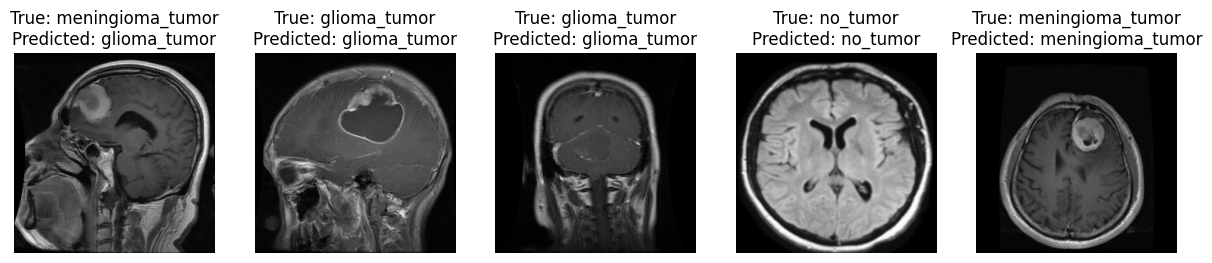

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Select a few random images from the test set
num_images_to_display = 5
random_indices = np.random.choice(len(X_test), size=num_images_to_display, replace=False)
test_images = X_test[random_indices]
true_labels = y_test[random_indices]

# Make predictions on the selected images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Display the images with predictions
plt.figure(figsize=(15, 10))
for i, image in enumerate(test_images):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(image)
    plt.title(f"True: {labels[np.argmax(true_labels[i])]}\nPredicted: {labels[predicted_labels[i]]}")
    plt.axis('off')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true = np.argmax(y_test, axis=1)  # Convert true labels to class labels

# Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=labels)
print(report)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.83      0.87      0.85        93
meningioma_tumor       0.89      0.78      0.83        95
        no_tumor       0.88      0.96      0.92        52
 pituitary_tumor       0.97      0.99      0.98        87

        accuracy                           0.89       327
       macro avg       0.89      0.90      0.89       327
    weighted avg       0.89      0.89      0.89       327



In [ ]:
from scipy.stats import ttest_ind # Import ttest_ind from scipy.stats
from scipy.stats import norm # Import norm from scipy.stats

# Z-test for train and test accuracy
def z_test(p1, p2, n1, n2):
    p_combined = (p1 * n1 + p2 * n2) / (n1 + n2)
    standard_error = np.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))
    z_score = (p1 - p2) / standard_error
    p_value = 2 * (1 - norm.cdf(abs(z_score)))  # Two-tailed test
    return z_score, p_value

train_samples = len(X_train)
test_samples = len(X_test)
# Get the final training accuracy from the history object
train_accuracy = history.history['accuracy'][-1]
# Assuming 'accuracy' in Global Variables is test accuracy
test_accuracy = accuracy
z_score, p_value = z_test(train_accuracy, test_accuracy, train_samples, test_samples)
print(f"Z-score: {z_score:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant difference between train and test accuracy (p < 0.05). Model may be overfitting.")
else:
    print("No significant difference between train and test accuracy.")

# T-test for train and test accuracy
t_stat, t_p_value = ttest_ind(history.history['accuracy'], history.history['val_accuracy']) # Now you can use ttest_ind
print(f"T-test Statistic: {t_stat:.4f}, P-value: {t_p_value:.4f}")

# ANOVA test for multiple accuracy values

# Assuming you want to perform ANOVA, you'll need to import f_oneway
from scipy.stats import f_oneway # Import f_oneway from scipy.stats

anova_stat, anova_p_value = f_oneway(history.history['accuracy'], history.history['val_accuracy']) # Now you can use f_oneway
print(f"ANOVA F-statistic: {anova_stat:.4f}, P-value: {anova_p_value:.4f}")

if anova_p_value < 0.05:
    print("Significant differences exist between training and validation accuracy over epochs.")
else:
    print("No significant differences between training and validation accuracy.")

Z-score: 12.7853, P-value: 0.0000
Significant difference between train and test accuracy (p < 0.05). Model may be overfitting.
T-test Statistic: 1.3275, P-value: 0.1919
ANOVA F-statistic: 1.7623, P-value: 0.1919
No significant differences between training and validation accuracy.
